###Importing Required Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
from sklearn.tree import export_graphviz
import seaborn as sns
%matplotlib inline
import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier 
from plotly import express as px, graph_objects as go
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from pandas.plotting import parallel_coordinates
import sklearn 
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR 
# importing necessary libraries from sklearn import linear_model 
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [2]:
dataset = pd.read_csv('/content/CO2 Emissions_dataset.csv')
dataset.drop_duplicates()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),classify
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196,1
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221,2
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136,1
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255,2
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219,2
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232,2
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240,2
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232,2


In [3]:
dataset.rename(columns={'CO2 Emissions(g/km)':'CO2_emission'}, inplace=True)

In [4]:
# Putting different transmission sub-catagories into their respective catagories

dataset['Transmission'] = np.where(dataset['Transmission'].isin(['A4','A5','A6','A7','A8','A9','A10']),'Automatic',dataset['Transmission'])
dataset['Transmission'] = np.where(dataset['Transmission'].isin(['AS4','AS5','AS6','AS7','AS8','AS9','AS10']),'Automatic of Selective type',dataset['Transmission'])
dataset['Transmission'] = np.where(dataset['Transmission'].isin(['AM5','AM6','AM7','AM8','AM9']),'Automated Manual',dataset['Transmission'])
dataset['Transmission'] = np.where(dataset['Transmission'].isin(['AV','AV6','AV7','AV8','AV10']),'CVT',dataset['Transmission'])
dataset['Transmission'] = np.where(dataset['Transmission'].isin(['M5','M6','M7']),'Manual',dataset['Transmission'])

In [5]:
# Renaming fuel types for better understanding

dataset['Fuel Type']= np.where(dataset['Fuel Type']=='X','Regular gasoline',dataset['Fuel Type'])
dataset['Fuel Type']= np.where(dataset['Fuel Type']=='Z','Premium gasoline',dataset['Fuel Type'])
dataset['Fuel Type']= np.where(dataset['Fuel Type']=='E','Ethanol',dataset['Fuel Type'])
dataset['Fuel Type']= np.where(dataset['Fuel Type']=='D','Diesel',dataset['Fuel Type'])
dataset['Fuel Type']= np.where(dataset['Fuel Type']=='N','Natural gas',dataset['Fuel Type'])

In [6]:
dataset.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2_emission,classify
0,ACURA,ILX,COMPACT,2.0,4,Automatic of Selective type,Premium gasoline,9.9,6.7,8.5,33,196,1
1,ACURA,ILX,COMPACT,2.4,4,Manual,Premium gasoline,11.2,7.7,9.6,29,221,2
2,ACURA,ILX HYBRID,COMPACT,1.5,4,CVT,Premium gasoline,6.0,5.8,5.9,48,136,1
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,Automatic of Selective type,Premium gasoline,12.7,9.1,11.1,25,255,2
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,Automatic of Selective type,Premium gasoline,12.1,8.7,10.6,27,244,2


In [7]:
dataset.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2_emission                        0
classify                            0
dtype: int64

In [8]:
dataset.duplicated().sum()

1112

In [9]:
missing_values = ["n/a", "na", "--","NA","NAN","N/A"]

In [10]:
pd.read_csv("CO2 Emissions_dataset.csv", na_values = missing_values)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),classify
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196,1
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221,2
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136,1
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255,2
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219,2
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232,2
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240,2
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232,2


In [11]:
dataset.drop_duplicates()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2_emission,classify
0,ACURA,ILX,COMPACT,2.0,4,Automatic of Selective type,Premium gasoline,9.9,6.7,8.5,33,196,1
1,ACURA,ILX,COMPACT,2.4,4,Manual,Premium gasoline,11.2,7.7,9.6,29,221,2
2,ACURA,ILX HYBRID,COMPACT,1.5,4,CVT,Premium gasoline,6.0,5.8,5.9,48,136,1
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,Automatic of Selective type,Premium gasoline,12.7,9.1,11.1,25,255,2
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,Automatic of Selective type,Premium gasoline,12.1,8.7,10.6,27,244,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,Automatic of Selective type,Premium gasoline,10.7,7.7,9.4,30,219,2
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,Automatic of Selective type,Premium gasoline,11.2,8.3,9.9,29,232,2
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,Automatic of Selective type,Premium gasoline,11.7,8.6,10.3,27,240,2
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,Automatic of Selective type,Premium gasoline,11.2,8.3,9.9,29,232,2


In [12]:
print(dataset['Make'].value_counts())
print(dataset['Model'].value_counts())
print(dataset['Vehicle Class'].value_counts())
print(dataset['Transmission'].value_counts())
print(dataset['Fuel Type'].value_counts())

FORD             628
CHEVROLET        588
BMW              527
MERCEDES-BENZ    419
PORSCHE          376
TOYOTA           330
GMC              328
AUDI             286
NISSAN           259
JEEP             251
DODGE            246
KIA              231
HONDA            214
HYUNDAI          210
MINI             204
VOLKSWAGEN       197
MAZDA            180
LEXUS            178
JAGUAR           160
CADILLAC         158
SUBARU           140
VOLVO            124
INFINITI         108
BUICK            103
RAM               97
LINCOLN           96
MITSUBISHI        95
CHRYSLER          88
LAND ROVER        85
FIAT              73
ACURA             72
MASERATI          61
ROLLS-ROYCE       50
ASTON MARTIN      47
BENTLEY           46
LAMBORGHINI       41
ALFA ROMEO        30
GENESIS           25
SCION             22
SMART              7
BUGATTI            3
SRT                2
Name: Make, dtype: int64
F-150 FFV 4X4           32
F-150 FFV               32
MUSTANG                 27
FOCUS FFV   

In [13]:
make_freq = dataset['Make'].value_counts().to_dict()
model_freq = dataset['Model'].value_counts().to_dict()
vehclass_freq = dataset['Vehicle Class'].value_counts().to_dict()
fuel_freq = dataset['Fuel Type'].value_counts().to_dict()
trans_freq = dataset['Transmission'].value_counts().to_dict()
dataset['Make'] = dataset['Make'].map(make_freq)
dataset['Model'] = dataset['Model'].map(model_freq)
dataset['Vehicle Class'] = dataset['Vehicle Class'].map(vehclass_freq)
dataset['Fuel Type'] = dataset['Fuel Type'].map(fuel_freq)
dataset['Transmission'] = dataset['Transmission'].map(trans_freq)

In [14]:
#fueld = pd.get_dummies(dataset['Fuel Type'], prefix='Fuel', drop_first=True)
#tranmissiond = pd.get_dummies(dataset["Transmission"], drop_first=True)

In [15]:
#datad = [dataset, fueld, tranmissiond]
#dataset = pd.concat(datad)
#dataset = dataset.fillna(0)
dataset.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2_emission,classify
0,72,9,1022,2.0,4,3127,3202,9.9,6.7,8.5,33,196,1
1,72,9,1022,2.4,4,1185,3202,11.2,7.7,9.6,29,221,2
2,72,2,1022,1.5,4,576,3202,6.0,5.8,5.9,48,136,1
3,72,1,1217,3.5,6,3127,3202,12.7,9.1,11.1,25,255,2
4,72,7,1217,3.5,6,3127,3202,12.1,8.7,10.6,27,244,2


In [16]:
#make_freq = dataset['Make'].value_counts().to_dict()
#model_freq = dataset['Model'].value_counts().to_dict()
#ehclass_freq = dataset['Vehicle Class'].value_counts().to_dict()
#dataset['Make'] = dataset['Make'].map(make_freq)
#dataset['Model'] = dataset['Model'].map(model_freq)
#dataset['Vehicle Class'] = dataset['Vehicle Class'].map(vehclass_freq)
#dataset.drop(['Fuel Type'], inplace=True, axis=1)
#dataset.drop(['Transmission'], inplace=True, axis=1)
#dataset.head()


In [17]:
dataset.shape

(7385, 13)

In [18]:
dataset.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2_emission', 'classify '],
      dtype='object')

In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   int64  
 1   Model                             7385 non-null   int64  
 2   Vehicle Class                     7385 non-null   int64  
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   int64  
 6   Fuel Type                         7385 non-null   int64  
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2_emission                      7385 non-null   int64  
 12  classi

### Split Data and Scale

In [20]:
X = dataset.drop(['CO2_emission', 'classify '], axis = 1)
X.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
0,72,9,1022,2.0,4,3127,3202,9.9,6.7,8.5,33
1,72,9,1022,2.4,4,1185,3202,11.2,7.7,9.6,29
2,72,2,1022,1.5,4,576,3202,6.0,5.8,5.9,48
3,72,1,1217,3.5,6,3127,3202,12.7,9.1,11.1,25
4,72,7,1217,3.5,6,3127,3202,12.1,8.7,10.6,27


In [21]:
y = dataset['CO2_emission']
yc = dataset['classify ']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state =0)
X_train, X_test, Yc_train, Yc_test = train_test_split(X, yc, test_size=0.2, random_state =0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
0,72,9,1022,2.0,4,3127,3202,9.9,6.7,8.5,33
1,72,9,1022,2.4,4,1185,3202,11.2,7.7,9.6,29
2,72,2,1022,1.5,4,576,3202,6.0,5.8,5.9,48
3,72,1,1217,3.5,6,3127,3202,12.7,9.1,11.1,25
4,72,7,1217,3.5,6,3127,3202,12.1,8.7,10.6,27


###SVR

In [22]:
from sklearn.svm import LinearSVR
model = LinearSVR()
model.fit(X_train, Y_train)
y_svr_pred = model.predict(X_test)
print('RMSE: {:0.4f}'.format(np.sqrt(mean_squared_error(Y_test,y_svr_pred))))
print('MAE: {:0.4f}'.format(mean_absolute_error(Y_test,y_svr_pred)))
print('R2_score: {:0.4f}'.format(r2_score(Y_test,y_svr_pred)))

RMSE: 18.7447
MAE: 7.7048
R2_score: 0.8974


In [23]:
frames = [y_svr_pred, Y_test.values]
result_pred = pd.DataFrame(data=frames)
result_pred = result_pred.T
result_pred.head()

,0,1
0,241.129344,241.0
1,155.685553,229.0
2,252.543291,253.0
3,183.784070,183.0
4,230.941414,231.0


In [24]:
y_svr_pred = result_pred.rename(columns={0: 'pred_values', 1:'real_values'})
y_svr_pred['pred_values'] = (y_svr_pred['pred_values'].map(lambda x: round(x,2)))
y_svr_pred['diff'] = abs(y_svr_pred['real_values'] -y_svr_pred['pred_values'])
print('mean diff: ', round(abs(y_svr_pred['diff']).mean(),4))

mean diff:  7.7047


###Random Forest Regression

In [25]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, Y_train)
y_rf_pred = rf_model.predict(X_test)
y_rf_pred
print('RMSE: {:0.4f}'.format(np.sqrt(mean_squared_error(Y_test,y_rf_pred))))
print('MAE: {:0.4f}'.format(mean_absolute_error(Y_test,y_rf_pred)))
print('R2_score: {:0.4f}'.format(r2_score(Y_test,y_rf_pred)))

RMSE: 4.8192
MAE: 1.9124
R2_score: 0.9932


In [26]:
# Use the forest's predict method on the test data
predictions = rf_model.predict(X_test)

# Calculate the absolute errors
errors = abs(predictions - Y_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 1.91 degrees.


In [27]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / Y_test)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 99.18 %.


In [28]:
# Limit depth of tree to 3 levels
import pydot
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(X_train, Y_train)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = X.columns, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

In [29]:
frames = [y_rf_pred, Y_test.values]
result_pred = pd.DataFrame(data=frames)
result_pred = result_pred.T
result_pred.head()

,0,1
0,240.830000,241.0
1,228.745000,229.0
2,255.470000,253.0
3,183.758333,183.0
4,231.740000,231.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


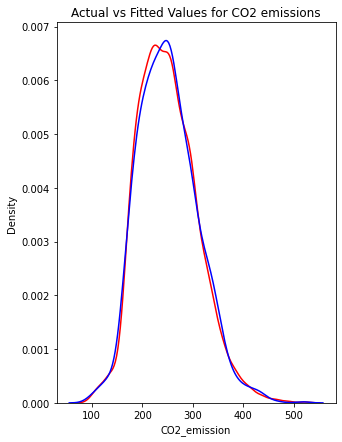

In [30]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_rf_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for CO2 emissions')


plt.show()
plt.close()


In [31]:
y_rf_pred = result_pred.rename(columns={0: 'pred_values', 1:'real_values'})
y_rf_pred['pred_values'] = (y_rf_pred['pred_values'].map(lambda x: round(x,2)))

y_rf_pred['diff'] = abs(y_rf_pred['real_values'] -y_rf_pred['pred_values'])


print('mean diff: ', round(abs(y_rf_pred['diff']).mean(),4))

mean diff:  1.9123


####Variable Importance

In [32]:
# Get numerical feature importances
importances = list(rf_model.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Fuel Consumption Comb (L/100 km) Importance: 0.82
Variable: Fuel Consumption Comb (mpg) Importance: 0.1
Variable: Fuel Type            Importance: 0.05
Variable: Fuel Consumption City (L/100 km) Importance: 0.02
Variable: Engine Size(L)       Importance: 0.01
Variable: Make                 Importance: 0.0
Variable: Model                Importance: 0.0
Variable: Vehicle Class        Importance: 0.0
Variable: Cylinders            Importance: 0.0
Variable: Transmission         Importance: 0.0
Variable: Fuel Consumption Hwy (L/100 km) Importance: 0.0


####Two most Important features : Use them for the accuracy test and see the differences 

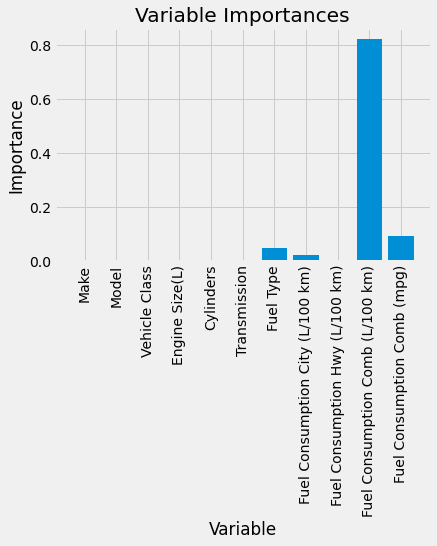

In [33]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, X, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

###Variable Random Forest

In [34]:
feature = pd.DataFrame(data=dataset['Fuel Consumption Comb (L/100 km)'].values,columns = ['Fuel Consumption Comb (L/100 km)'])
#df2 = pd.DataFrame(data=sf.values, columns=['list'])
label = dataset['CO2_emission']
feature_train, feature_test, label_train, label_test = train_test_split(feature, label, test_size=0.2, random_state =0)
scaler = StandardScaler()
feature_train = scaler.fit_transform(feature_train)
feature_test = scaler.transform(feature_test)
feature.head()

,Fuel Consumption Comb (L/100 km)
0,8.5
1,9.6
2,5.9
3,11.1
4,10.6


In [35]:
rf_model1 = RandomForestRegressor()
rf_model1.fit(feature_train, label_train)
y_predimp = rf_model1.predict(feature_test)
y_predimp
print('RMSE: {:0.4f}'.format(np.sqrt(mean_squared_error(label_test,y_predimp))))
print('MAE: {:0.4f}'.format(mean_absolute_error(label_test,y_predimp)))
print('R2_score: {:0.4f}'.format(r2_score(label_test,y_predimp)))

RMSE: 19.6753
MAE: 7.9937
R2_score: 0.8870


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


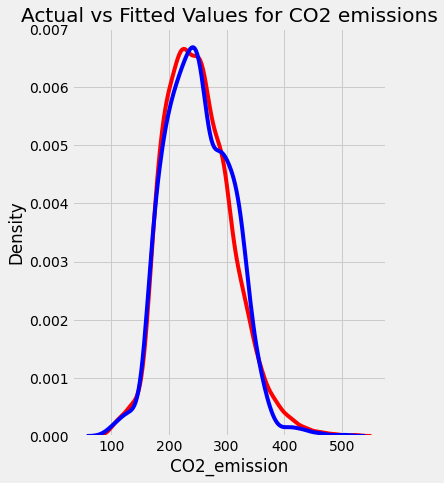

In [36]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_predimp, hist=False, color="b", label="Fitted Values" , ax=ax)
plt.title('Actual vs Fitted Values for CO2 emissions')

plt.show()
plt.close()


In [37]:
# Calculate mean absolute percentage error (MAPE)
# Use the forest's predict method on the test data
predictions1 = rf_model1.predict(feature_test)

# Calculate the absolute errors
errors1 = abs(predictions - label_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = 100 * (errors1 / label_test)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 1.91 degrees.
Accuracy: 99.18 %.


In [38]:
feature2 = dataset[['Fuel Consumption Comb (L/100 km)','Fuel Consumption Comb (mpg)']]
label2 = dataset['CO2_emission']
feature2_train, feature2_test, label2_train, label2_test = train_test_split(feature2, label2, test_size=0.2, random_state =0)
scaler = StandardScaler()
feature2_train = scaler.fit_transform(feature2_train)
feature2_test = scaler.transform(feature2_test)
feature2.head()

,Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
0,8.5,33
1,9.6,29
2,5.9,48
3,11.1,25
4,10.6,27


In [39]:
rf_model2 = RandomForestRegressor()
rf_model2.fit(feature2_train, label2_train)
y_predimp2 = rf_model2.predict(feature2_test)
y_predimp2
print('RMSE: {:0.4f}'.format(np.sqrt(mean_squared_error(label2_test,y_predimp2))))
print('MAE: {:0.4f}'.format(mean_absolute_error(label2_test,y_predimp2)))
print('R2_score: {:0.4f}'.format(r2_score(label2_test,y_predimp2)))

RMSE: 19.6419
MAE: 7.9977
R2_score: 0.8874


####Two most Important features : Use them for the accuracy test and see the differences - important from chi2 

In [40]:
feature3 = dataset[['Fuel Consumption Comb (L/100 km)','Fuel Consumption Comb (mpg)','Fuel Type']]
label3 = dataset['CO2_emission']
feature3_train, feature3_test, label3_train, label3_test = train_test_split(feature3, label3, test_size=0.2, random_state =0)
scaler = StandardScaler()
feature3_train = scaler.fit_transform(feature3_train)
feature3_test = scaler.transform(feature3_test)
feature3.head()


,Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),Fuel Type
0,8.5,33,3202
1,9.6,29,3202
2,5.9,48,3202
3,11.1,25,3202
4,10.6,27,3202


In [41]:
rf_model3 = RandomForestRegressor()
rf_model3.fit(feature3_train, label3_train)
y_predimp3 = rf_model3.predict(feature3_test)
y_predimp3
print('RMSE: {:0.4f}'.format(np.sqrt(mean_squared_error(label3_test,y_predimp3))))
print('MAE: {:0.4f}'.format(mean_absolute_error(label3_test,y_predimp3)))
print('R2_score: {:0.4f}'.format(r2_score(label3_test,y_predimp3)))

RMSE: 5.7268
MAE: 2.3975
R2_score: 0.9904


In [42]:
feature4 = dataset[['Fuel Consumption Comb (L/100 km)','Fuel Consumption Comb (mpg)','Fuel Type','Fuel Consumption City (L/100 km)']]
label4 = dataset['CO2_emission']
feature4_train, feature4_test, label4_train, label4_test = train_test_split(feature4, label4, test_size=0.2, random_state =0)
scaler = StandardScaler()
feature4_train = scaler.fit_transform(feature4_train)
feature4_test = scaler.transform(feature4_test)
feature4.head()

,Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),Fuel Type,Fuel Consumption City (L/100 km)
0,8.5,33,3202,9.9
1,9.6,29,3202,11.2
2,5.9,48,3202,6.0
3,11.1,25,3202,12.7
4,10.6,27,3202,12.1


In [43]:
rf_model4 = RandomForestRegressor()
rf_model4.fit(feature4_train, label4_train)
y_predimp4 = rf_model4.predict(feature4_test)
y_predimp4
print('RMSE: {:0.4f}'.format(np.sqrt(mean_squared_error(label4_test,y_predimp4))))
print('MAE: {:0.4f}'.format(mean_absolute_error(label4_test,y_predimp4)))
print('R2_score: {:0.4f}'.format(r2_score(label4_test,y_predimp4)))

RMSE: 6.2498
MAE: 2.1744
R2_score: 0.9886


In [44]:
feature5 = dataset[['Fuel Consumption Comb (L/100 km)','Fuel Consumption Comb (mpg)','Fuel Type','Fuel Consumption City (L/100 km)','Engine Size(L)']]
label5 = dataset['CO2_emission']
feature5_train, feature5_test, label5_train, label5_test = train_test_split(feature5, label5, test_size=0.2, random_state =0)
scaler = StandardScaler()
feature5_train = scaler.fit_transform(feature5_train)
feature5_test = scaler.transform(feature5_test)
feature4.head()
rf_model5 = RandomForestRegressor()
rf_model5.fit(feature5_train, label5_train)
y_predimp5 = rf_model5.predict(feature5_test)
y_predimp5
print('RMSE: {:0.4f}'.format(np.sqrt(mean_squared_error(label5_test,y_predimp5))))
print('MAE: {:0.4f}'.format(mean_absolute_error(label5_test,y_predimp5)))
print('R2_score: {:0.4f}'.format(r2_score(label5_test,y_predimp5)))

RMSE: 4.7222
MAE: 1.9537
R2_score: 0.9935


!pip install numpy
!pip install pandas
!pip install sklearn
!pip install seaborn
!pip install rfpimp
!pip install eli5
!pip install xgboost
!pip install matplotlib

In [45]:
import numpy.random as nr
import sklearn.model_selection as ms
from sklearn import feature_selection as fs
# define a random state number for all random operations - ensures reproducibility of all results
random_state_num = 0
# Set folds for cross validation for the feature selection
nr.seed(1)
feature_folds = ms.KFold(n_splits=4, shuffle = True, random_state=random_state_num)

# Define the model
rf_selector = RandomForestRegressor(random_state=random_state_num) 

# Define an objects for a model for recursive feature elimination with CV
nr.seed(1)
selector = fs.RFECV(estimator = rf_selector, cv = feature_folds, scoring = 'r2', n_jobs=-1)

selector = selector.fit(X_train, np.ravel(Y_train))
selector.support_

print("Feature ranking after RFECV:")
print(selector.ranking_)

# print the important features
ranks_transform = list(np.transpose(selector.ranking_))
chosen_features = [i for i,j in zip(X.columns,ranks_transform) if j==1]
print("Chosen important features:")
print(chosen_features)

Feature ranking after RFECV:
[3 4 5 1 1 6 1 1 2 1 1]
Chosen important features:
['Engine Size(L)', 'Cylinders', 'Fuel Type', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)']


In [46]:
# assign only the important variables to the features array of both training and testing dataset
features_train_reduced = selector.transform(X_train)
features_test_reduced = selector.transform(X_test)

print("Training subset shape before the recursive feature elimination:")
print(X_train.shape)
print("Training subset array shape after the recursive feature elimination:")
print(features_train_reduced.shape)
print("Test subset array shape after the recursive feature elimination:")
print(features_test_reduced.shape)

Training subset shape before the recursive feature elimination:
(5908, 11)
Training subset array shape after the recursive feature elimination:
(5908, 6)
Test subset array shape after the recursive feature elimination:
(1477, 6)


In [47]:
# import all needed libraries
import pandas as pd
import numpy as np
import numpy.random as nr
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.model_selection as ms
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import feature_selection as fs

In [48]:
# define a random state number for all random operations - ensures reproducibility of all results
random_state_num = 0

In [49]:
# Define value ranges for each hyperparameter
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

# Create the hyperparameter grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [50]:
# define the cross-validation folds for the hyperparameter tuning
nr.seed(1)
inside_folds = ms.KFold(n_splits=5, shuffle = True, random_state=random_state_num)

# Define the random forest regressor model object
rf_tuner = RandomForestRegressor(random_state=random_state_num)

# Perform a randomized search on the grid
nr.seed(1)
rf_model = ms.RandomizedSearchCV(estimator=rf_tuner, param_distributions = param_grid,
                                 random_state=random_state_num, refit=True,
                                 cv=inside_folds, scoring = 'r2', return_train_score=True, n_jobs=-1)

In [51]:
# Fit the grid search model object with cross-validation on the data
rf_model.fit(features_train_reduced, np.ravel(Y_train))

# Print the best parameter value
best_n_estimators = rf_model.best_estimator_.n_estimators
best_max_features = rf_model.best_estimator_.max_features
print("best number of estimators:")
print(best_n_estimators)
print("best max_features:")
print(best_max_features)
print("max_depth:")
print(rf_model.best_estimator_.max_depth)
print("min_samples_split")
print(rf_model.best_estimator_.min_samples_split)
print("min_samples_leaf")
print(rf_model.best_estimator_.min_samples_leaf)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


best number of estimators:
1600
best max_features:
sqrt
max_depth:
20
min_samples_split
2
min_samples_leaf
1


In [52]:
# pick the model with the best hyperparameter combination for further analysis
rf_best_model = rf_model.best_estimator_

In [ ]:
# define the cross-validation folds for the evaluation
nr.seed(1)
outside_folds = ms.KFold(n_splits=10, shuffle = True, random_state=random_state_num)

# Evaluate the model on the training subset with cross-validation
nr.seed(1)
cv_eval = cross_val_score(rf_best_model, features_train_reduced, Y_train, cv = outside_folds, n_jobs=-1)

print('Mean R2 score of all CV folds = %4.3f' % np.mean(cv_eval))
print('Standard deviation of the R2 score over all folds = %4.3f' % np.std(cv_eval))
print('R2 score for each fold:')

# print the R2 score for each fold
for i, j in enumerate(cv_eval):
    print('Fold %2d    %4.3f' % (i+1, j))

In [ ]:
# make predictions from the features of the testing subset
predictions = rf_best_model.predict(features_test_reduced)

# import the functions for the metrics evaluation
from sklearn.metrics import r2_score, mean_squared_error

# calculate the metrics basing on the predicted and true values for the test subset
r2 = r2_score(y_true=label_test, y_pred=predictions)
mse = mean_squared_error(y_true=label_test, y_pred=predictions)
rmse = np.sqrt(mse)

print("R2=")
print(r2)
print("Mean Squared Error: MSE=")
print(mse)
print("Root Mean Squared Error: RMSE=")
print(rmse)

In [ ]:
# plot predicted vs true values of the test subset

f,ax=plt.subplots(figsize=(20,15))
sns.set(font_scale=2)

sns.regplot(x=predictions, y=(label_test), fit_reg=True)
plt.xlabel("CO2 emissions per capita [t] - predicted")
plt.ylabel("CO2 emissions per capita [t] - true")
plt.title("Correlation coefficient R="+str(round(np.corrcoef(predictions,(label_test))[0,1],2)))
plt.show()